In [ ]:
import pandas as pd

In [ ]:
corona = pd.read_csv('../../csv/./corona.csv')

In [ ]:
corona.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
corona.head()

In [ ]:
df = corona.iloc[: , 0:3]

In [ ]:
df.sort_values('createDt', inplace=True)

In [ ]:
df.columns = ['등록일시', '총사망자', '총확진자']

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.loc[444:448]

In [ ]:
df.loc[445, '등록일시'] = '2021-05-31 00:00:00.000'

In [ ]:
df.sort_values('등록일시', inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
# 일일확진자 컬럼을 생성 
df['일일확진자'] = df['총확진자'].diff().fillna(0)

In [ ]:
df.head()

In [ ]:
# 등록일시를 시계열로 변경
df['등록일시'] = pd.to_datetime( df['등록일시'] )

In [ ]:
df.info()

In [ ]:
# 요일 컬럼을 생성 
df['요일'] = df['등록일시'].dt.weekday

In [ ]:
df.head()

In [ ]:
group_data = df[['요일', '일일확진자']].groupby('요일').mean()

In [37]:
import matplotlib.pyplot as plt

In [39]:
import platform

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else :
    plt.rc('font', family='Malgun Gothic')

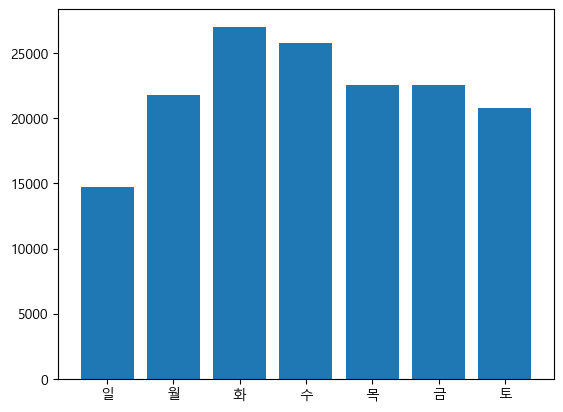

In [41]:
x = group_data.index
y = group_data['일일확진자']

plt.bar(x, y)
plt.xticks(x, ['일', '월', '화', '수', '목', '금', '토'])
plt.show()